In [1]:
import numpy as np
import networkx as nx
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
comments = '../data/1899_comments.zst'
submissions = '../data/1899_submissions.zst'

df_comments= pd.read_json(comments,compression=dict(method='zstd',
                  max_window_size=2147483648), lines=True)

df_submissions= pd.read_json(submissions,compression=dict(method='zstd',
                  max_window_size=2147483648), lines=True)

In [3]:
# comments
print("Comments DataFrame shape:", df_comments.shape)
print("Comments DataFrame columns:", df_comments.columns)

# submissions
print("Submissions DataFrame shape:", df_submissions.shape)
print("Submissions DataFrame columns:", df_submissions.columns)

# comments
print("First few rows of Comments DataFrame:")
print(df_comments.head())

# submissions
print("First few rows of Submissions DataFrame:")
print(df_submissions.head())

Comments DataFrame shape: (40489, 56)
Comments DataFrame columns: Index(['all_awardings', 'associated_award', 'author', 'author_created_utc',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders',
       'body', 'can_gild', 'can_mod_post', 'collapsed',
       'collapsed_because_crowd_control', 'collapsed_reason', 'comment_type',
       'controversiality', 'created_utc', 'distinguished', 'edited', 'gilded',
       'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'no_follow',
       'parent_id', 'permalink', 'quarantined', 'removal_reason',
       'retrieved_on', 'score', 'send_replies', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_name_prefixed', 'subreddit_type',
       'top_awarded_type', 'total_awards_received', 'treatment_tags',
       'arc

In [4]:
# Missing Value
print("Missing values in Comments DataFrame:")
print(df_comments.isnull().sum())

Missing values in Comments DataFrame:
all_awardings                          0
associated_award                   40489
author                                 0
author_created_utc                  1473
author_flair_background_color      39101
author_flair_css_class             40489
author_flair_richtext               1388
author_flair_template_id           40489
author_flair_text                  40489
author_flair_text_color            39101
author_flair_type                   1388
author_fullname                     1388
author_patreon_flair                1388
author_premium                      1388
awarders                           40454
body                                   0
can_gild                               0
can_mod_post                       40454
collapsed                              0
collapsed_because_crowd_control    40489
collapsed_reason                   40272
comment_type                       40489
controversiality                       0
created_utc        

In [5]:
df_comments.head()

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,archived,collapsed_reason_code,name,retrieved_utc,score_hidden,author_is_blocked,unrepliable_reason,author_cakeday
0,[],NaN,looktotheeeast,NaN,None,NaN,[],NaN,NaN,None,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],NaN,[deleted],NaN,,NaN,NaN,NaN,NaN,dark,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],NaN,UnKnownWatcher343,NaN,None,NaN,[],NaN,NaN,None,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],NaN,[deleted],NaN,,NaN,NaN,NaN,NaN,dark,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],NaN,suicidalcentipede8,1.470544e+09,None,NaN,[],NaN,NaN,None,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_comments["id"].head()

0    fzwm00c
1    fzwr8tm
2    fzwsu7b
3    fzwtil0
4    fzwtjcl
Name: id, dtype: object

In [7]:
print("Missing values in Submissions DataFrame:")
print(df_submissions.isnull().sum())

Missing values in Submissions DataFrame:
quarantine           0
score                0
edited               0
stickied             0
created           3946
                  ... 
removed_by        3950
view_count        3950
call_to_action    3947
author_cakeday    3940
poll_data         3936
Length: 109, dtype: int64


In [8]:
df_submissions.head()

,quarantine,score,edited,stickied,created,from_kind,subreddit_id,url,secure_media,from_id,...,gallery_data,is_gallery,media_metadata,awarders,banned_by,removed_by,view_count,call_to_action,author_cakeday,poll_data
0,False,1,1400095853,False,1.400087e+09,NaN,t5_31roy,http://www.reddit.com/r/1899/comments/25jo07/p...,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,1,0,False,1.400099e+09,NaN,t5_31roy,http://www.reddit.com/r/1899/comments/25k9hi/p...,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,1,0,False,1.400100e+09,NaN,t5_31roy,http://www.reddit.com/r/1899/comments/25kae5/p...,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,1,0,False,1.400100e+09,NaN,t5_31roy,http://www.reddit.com/r/1899/comments/25kaz3/p...,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,2,0,False,NaN,NaN,t5_31roy,https://variety.com/2018/tv/news/netflix-dark-...,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_submissions["id"].head()

0    25jo07
1    25k9hi
2    25kae5
3    25kaz3
4    9xoq7w
Name: id, dtype: object

### Dataset Merge

In [10]:
# add child_id as comment id
df_comments['child_id'] = df_comments['id']

In [11]:
df_comments["parent_id"].head()
# Reddit type prefixes: t1_: Comment; t2_: Account; t3_: Link; t4_: Message; t5_: Subreddit; t6_:Award
# Source: https://www.reddit.com/dev/api/
#If parent_id starts with t3_, set the link type for this line to "respond to a submission". 
#If parent_id starts with t1_, set the link type for this line to "respond to a comment".

0     t3_i1doyd
1     t3_i1doyd
2    t1_fzwr8tm
3    t1_fzwsu7b
4     t3_i1doyd
Name: parent_id, dtype: object

In [12]:
# Link type
df_comments['link_type'] = df_comments['parent_id'].apply(
    lambda x: 'respond to a submission' if x.startswith('t3') else 
              ('respond to a comment' if x.startswith('t1') else 'unknown')
)
df_comments["link_type"].head()

0    respond to a submission
1    respond to a submission
2       respond to a comment
3       respond to a comment
4    respond to a submission
Name: link_type, dtype: object

In [13]:
# Add full ID prefixes for submissions and comments so that they can be matched by those ids
df_submissions['full_id'] = 't3_' + df_submissions['id'].astype(str)
print(df_submissions['full_id'].head())

df_comments['full_id'] = 't1_' + df_comments['id'].astype(str)
print(df_comments['full_id'].head())

0    t3_25jo07
1    t3_25k9hi
2    t3_25kae5
3    t3_25kaz3
4    t3_9xoq7w
Name: full_id, dtype: object
0    t1_fzwm00c
1    t1_fzwr8tm
2    t1_fzwsu7b
3    t1_fzwtil0
4    t1_fzwtjcl
Name: full_id, dtype: object


In [14]:
# map authors with ID
submissions_author = df_submissions[['full_id', 'author']].reset_index(drop=True)
comments_author = df_comments[['full_id', 'author']].reset_index(drop=True)

# combine dataframe
combined_authors = pd.concat([submissions_author, comments_author])
id_map = combined_authors.set_index('full_id')['author'].to_dict()

In [15]:
# use parent_id to find its author
df_comments['parent_author'] = df_comments['parent_id'].map(id_map).fillna('none')

### Calculate degree, betweenness, closeness

In [16]:
# edges and network
def create_graph_from_edges(edges):
    """
    Creates and returns a graph from a list of edges.
    """
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

def compute_network_metrics(G):
    """
    Computes and returns network metrics for a given graph.
    """
    metrics = {
        'degrees': dict(G.degree()),
        'betweenness': nx.betweenness_centrality(G),
        'closeness': nx.closeness_centrality(G)
    }
    return metrics

# Prepare edges from the DataFrame
edges = list(zip(df_comments['parent_author'], df_comments['author']))

# Create a graph from edges
G = create_graph_from_edges(edges)

# Compute network metrics
network_metrics = compute_network_metrics(G)

# Compute degree, betweenness, closeness
degrees = network_metrics['degrees']
betweenness = network_metrics['betweenness']
closeness = network_metrics['closeness']

In [17]:
# print results：Top 20 nodes by degree
degrees_df = pd.DataFrame(list(degrees.items()), columns=['Node', 'Degree'])
top_20_degrees = degrees_df.sort_values(by='Degree', ascending=False).head(20)
print("Top 20 nodes by degree:")
print(top_20_degrees.to_string(index=False))

Top 20 nodes by degree:
                Node  Degree
       AutoModerator    1236
           [deleted]     969
             Treviso     918
             rosy148     612
      monikacherokee     513
          Tardislass     413
2_Fingers_of_Whiskey     363
   ElvisChopinJoplin     343
             tdciago     312
       OuroborosOFun     263
           hadrijana     227
      ObiWeedKannabi     214
     HankScorpio4242     214
             mac1899     199
       ninapendawewe     196
  AnakinRagnarsson66     182
    MasterOnionNorth     173
 ViciousNakedMoleRat     168
      netflixdark123     167
   IJustLost12Bricks     143


In [18]:
# print results：Top 20 nodes by betweenness centrality
betweenness_df = pd.DataFrame(list(betweenness.items()), columns=['Node', 'Betweenness Centrality'])
top_20_betweenness = betweenness_df.sort_values(by='Betweenness Centrality', ascending=False).head(20)
print("Top 20 nodes by betweenness centrality:")
print(top_20_betweenness.to_string(index=False))

Top 20 nodes by betweenness centrality:
                Node  Betweenness Centrality
       AutoModerator                0.231016
           [deleted]                0.191615
             Treviso                0.148059
             rosy148                0.083777
      monikacherokee                0.053683
          Tardislass                0.051635
2_Fingers_of_Whiskey                0.045038
   ElvisChopinJoplin                0.035152
             tdciago                0.027409
           hadrijana                0.020288
  AnakinRagnarsson66                0.019764
     HankScorpio4242                0.018890
      ObiWeedKannabi                0.018671
             mac1899                0.017958
 ViciousNakedMoleRat                0.016332
       OuroborosOFun                0.016108
       ninapendawewe                0.015942
    MasterOnionNorth                0.014515
      netflixdark123                0.013859
             psyopia                0.011535


In [19]:
# print results：Top 20 nodes by closeness centrality
closeness_df = pd.DataFrame(list(closeness.items()), columns=['Node', 'Closeness Centrality'])
top_20_closeness = closeness_df.sort_values(by='Closeness Centrality', ascending=False).head(20)
print("Top 20 nodes by closeness centrality:")
print(top_20_closeness.to_string(index=False))

Top 20 nodes by closeness centrality:
                Node  Closeness Centrality
           [deleted]              0.483991
       AutoModerator              0.469399
      monikacherokee              0.437097
          Tardislass              0.434977
   ElvisChopinJoplin              0.427608
2_Fingers_of_Whiskey              0.425254
             Treviso              0.423660
           hadrijana              0.417738
       ninapendawewe              0.414409
     HankScorpio4242              0.413552
      netflixdark123              0.410764
             tdciago              0.410073
      ObiWeedKannabi              0.409556
             mac1899              0.405153
    MasterOnionNorth              0.403288
    Western_Camp7920              0.402789
   IJustLost12Bricks              0.401379
       OuroborosOFun              0.398529
            mothsoup              0.398406
        Key_Dare5611              0.397412


### Top 20 influencers

In [20]:
# filter the author [deleted] as its influence cannot be tracked any more
# filter "AutoModerator" as it is a system built into reddit that allows moderators to 
# define "rules" (consisting of checks and actions) to be automatically applied to posts in their subreddit
df_submissions_filtered = df_submissions[~df_submissions['author'].isin(['[deleted]', 'AutoModerator'])]
df_comments_filtered = df_comments[~df_comments['author'].isin(['[deleted]', 'AutoModerator'])]

# count the number of submissions and comments for each author and set index
author_submissions_count = df_submissions_filtered.groupby('author').size().reset_index(name='num_submissions')
author_comments_count = df_comments_filtered.groupby('author').size().reset_index(name='num_comments')

# distinguish and counting comments in response to submissions and comments
comments_to_submissions_count = df_comments_filtered[df_comments_filtered['link_type'] == 'respond to a submission']\
                                .groupby('author').size().reset_index(name='num_comments_to_submissions')
comments_to_comments_count = df_comments_filtered[df_comments_filtered['link_type'] == 'respond to a comment']\
                                .groupby('author').size().reset_index(name='num_comments_to_comments')

# aggregate the counts into author_data for each author
author_data = pd.merge(author_submissions_count, author_comments_count, on='author', how='outer')
author_data = pd.merge(author_data, comments_to_submissions_count, on='author', how='outer')
author_data = pd.merge(author_data, comments_to_comments_count, on='author', how='outer').fillna(0)

# add network features into author_data 
author_data  = author_data.set_index('author')
author_data['degree'] = author_data.index.map(degrees).fillna(0)
author_data['betweenness'] = author_data.index.map(betweenness).fillna(0)
author_data['closeness'] = author_data.index.map(closeness).fillna(0)

#standardize the data
scaler = MinMaxScaler()
author_data_scaled = pd.DataFrame(scaler.fit_transform(author_data), columns=author_data.columns, index=author_data.index)

# set the weights and get score
weights = {
    'num_submissions': 0.1,
    'num_comments': 0.1,
    'num_comments_to_submissions': 0.3,
    'num_comments_to_comments': 0.3,
    'degree': 0.2
}

author_data_scaled['score'] = author_data_scaled.apply(lambda row: sum(row[col] * weights[col] for col in weights), axis=1)

# print top 20 by score
top_20_influencers = author_data_scaled.sort_values(by='score', ascending=False).head(20)
print(top_20_influencers[['score']])

                         score
author                        
monikacherokee        0.853688
OuroborosOFun         0.659976
ElvisChopinJoplin     0.652695
Tardislass            0.425656
tdciago               0.413557
mac1899               0.335935
2_Fingers_of_Whiskey  0.333334
ninapendawewe         0.269166
Treviso               0.242838
ObiWeedKannabi        0.226136
netflixdark123        0.224827
HankScorpio4242       0.218698
MasterOnionNorth      0.210597
mimi0108              0.195102
hadrijana             0.193878
Username_Hadrian      0.156372
betweenplanets        0.155523
IJustLost12Bricks     0.152146
JustYeeHaa            0.148510
InterviewPractical72  0.147715


### Top 100 Influencers Network Visual

In [22]:
top_100_influencers = author_data_scaled.sort_values(by='score', ascending=False).iloc[:100,]
top_100_influencers

,num_submissions,num_comments,num_comments_to_submissions,num_comments_to_comments,degree,betweenness,closeness,score
author,,,,,,,,
monikacherokee,0.634921,1.000000,1.000000,0.928105,0.558824,0.362577,1.000000,0.853688
OuroborosOFun,0.523810,0.843709,0.583587,0.969499,0.286492,0.108793,0.911762,0.659976
ElvisChopinJoplin,0.365079,0.837086,0.525836,1.000000,0.373638,0.237417,0.978291,0.652695
Tardislass,0.285714,0.459603,0.404255,0.466231,0.449891,0.348744,0.995148,0.425656
tdciago,0.698413,0.385430,0.553191,0.237473,0.339869,0.185121,0.938174,0.413557
...,...,...,...,...,...,...,...,...
instrangestofplaces,0.015873,0.078146,0.024316,0.111111,0.046841,0.009642,0.854605,0.059398
thequesocowboy,0.126984,0.054305,0.027356,0.069717,0.057734,0.018398,0.856204,0.058797
Yaksher,0.111111,0.051656,0.048632,0.050109,0.063181,0.023022,0.853052,0.058535


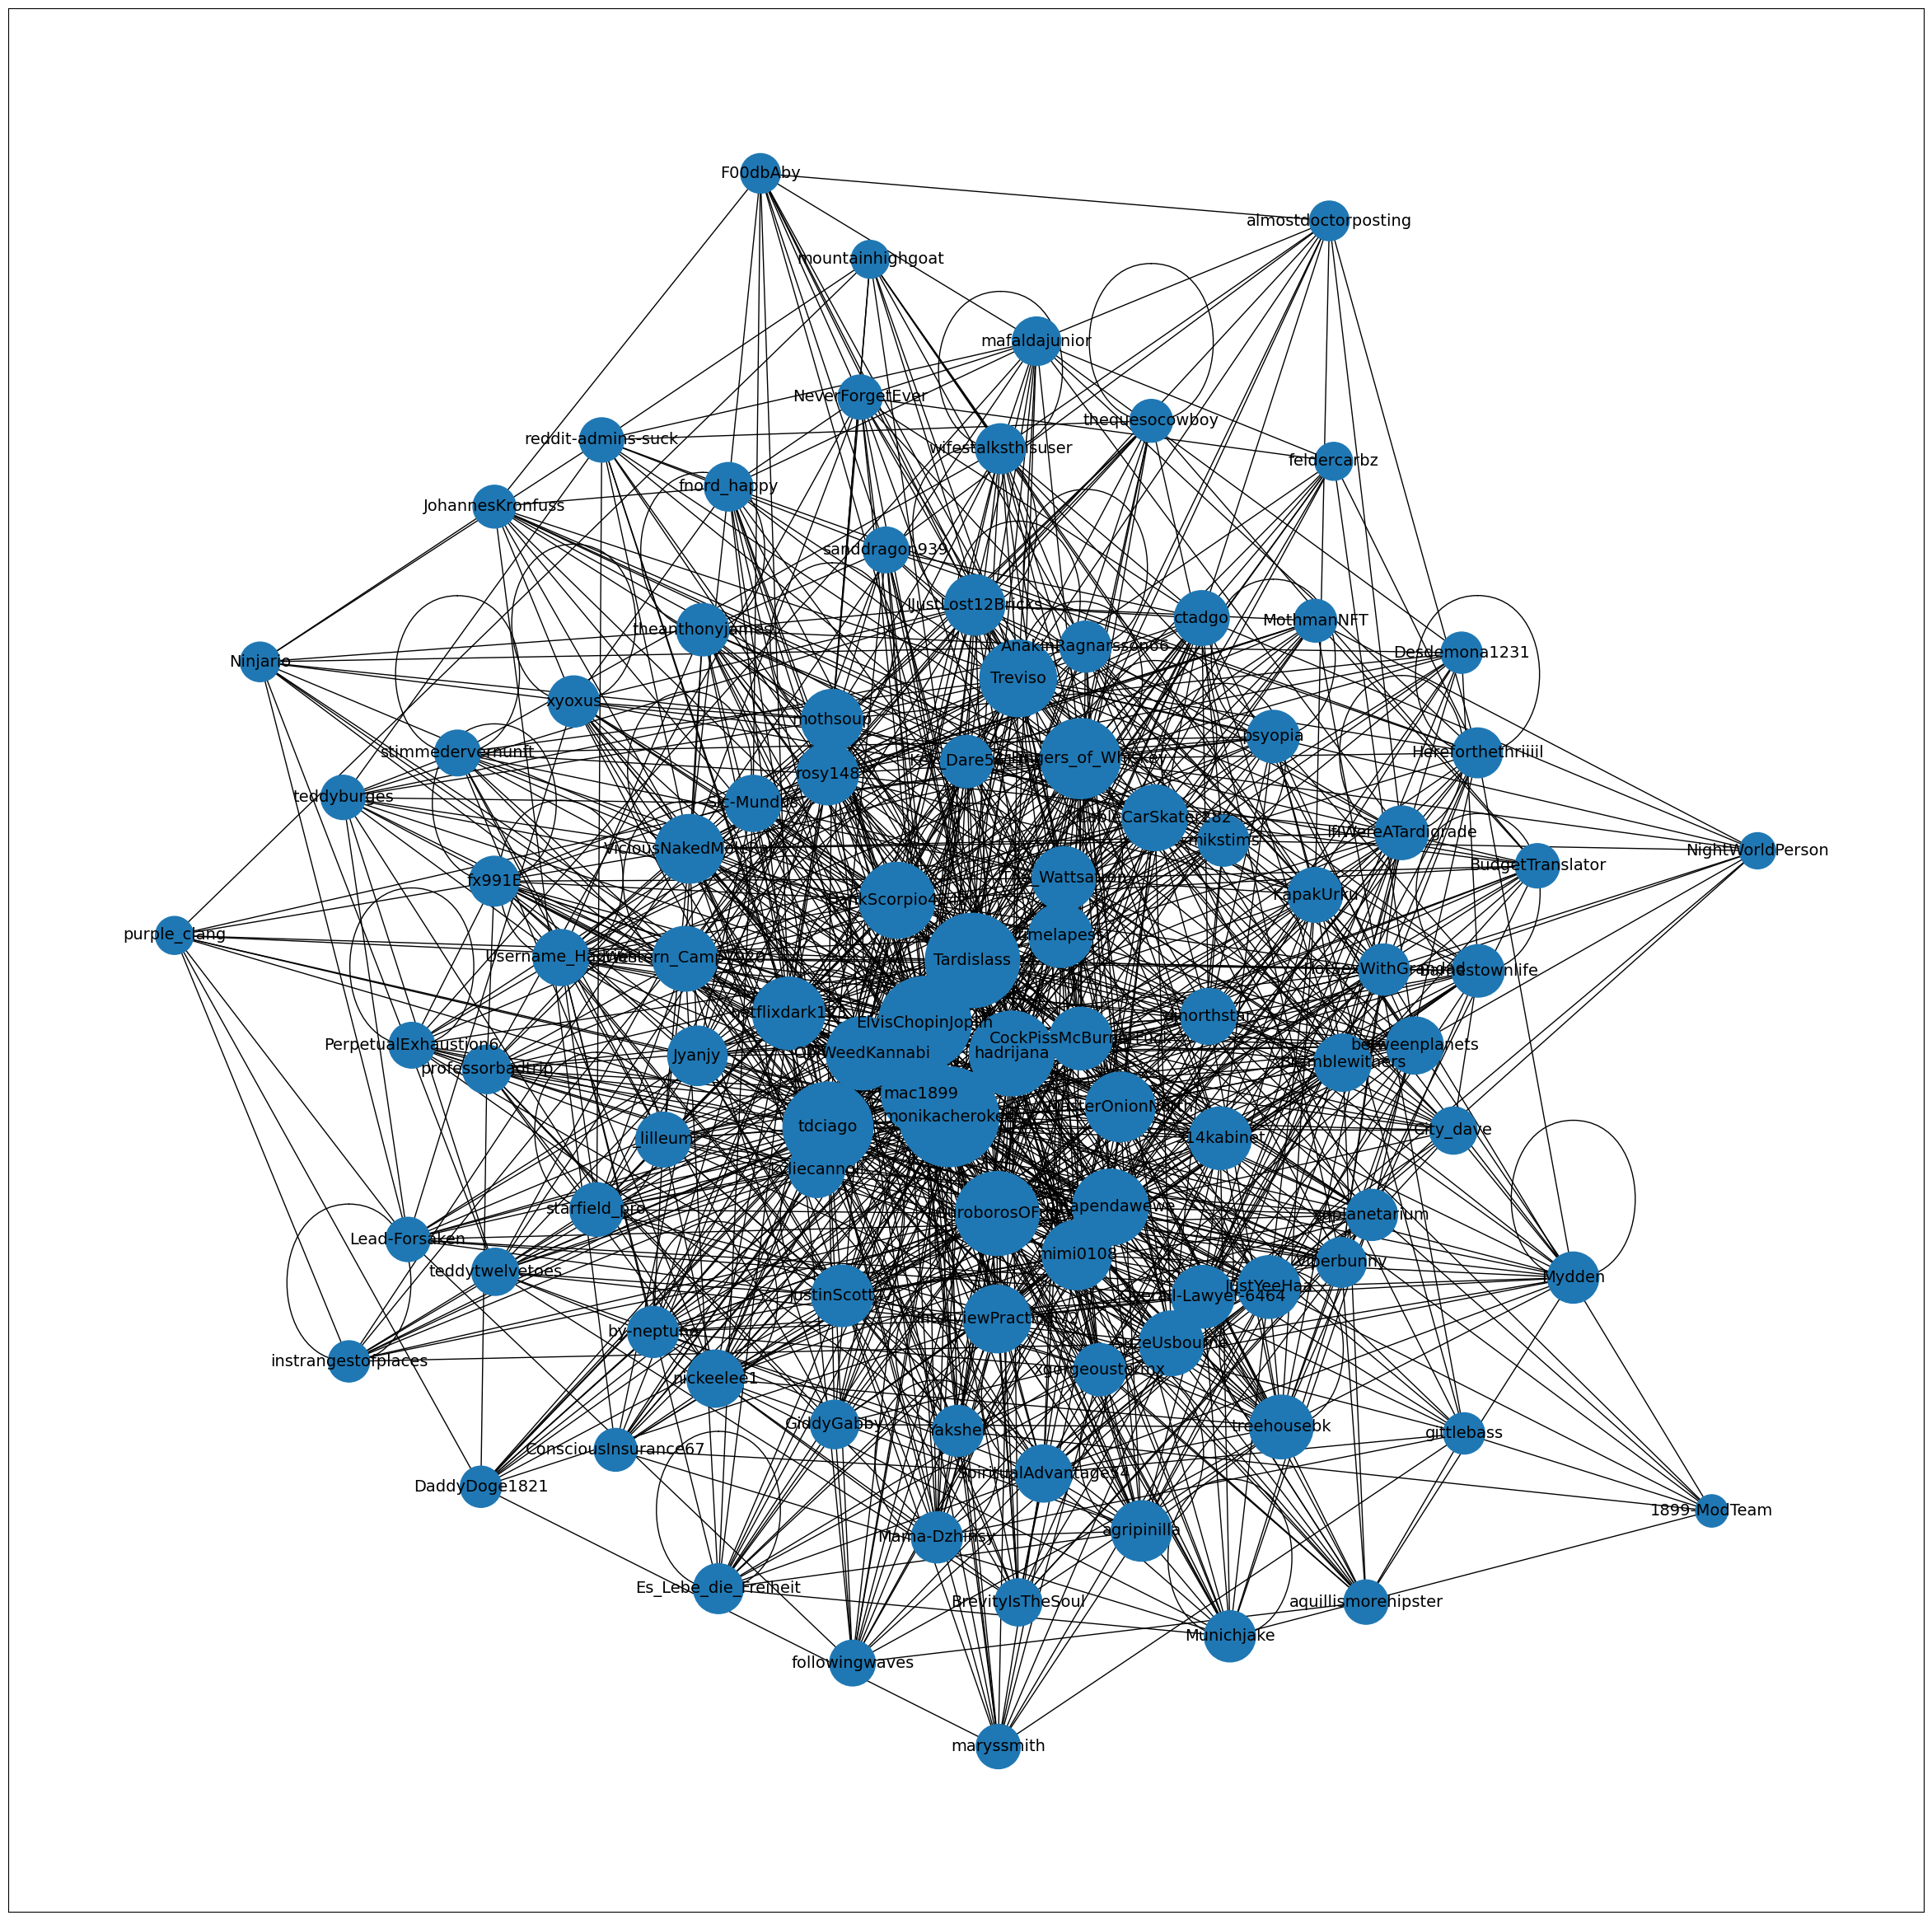

In [23]:
X = G.subgraph(top_100_influencers.index)

plt.figure(figsize=(30, 30))

# adjust layout
pos = nx.spring_layout(X)

# adjust node size based on degree
node_sizes = [X.degree(node) * 100 for node in X.nodes]

# draw nodes
degrees = dict(X.degree())
sizes = [val * 100 for val in degrees.values()]
nx.draw_networkx_nodes(X, pos, node_size=sizes)

# draw edges
edge_widths = [X[u][v].get('weight', 1) for u, v in X.edges]
nx.draw_networkx_edges(X, pos, width=edge_widths)

# draw labels
nx.draw_networkx_labels(X, pos, font_size=14)

plt.savefig("top_100_influencers.png")
plt.show() 